In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
import cv2
import os
import random

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
%matplotlib inline

In [5]:
import tensorflow as tf
import tensorflow.keras as keras


In [6]:
tf.__version__

'2.8.0'

In [7]:
tf.random.set_seed(42)
np.random.seed(42)


In [8]:
train_dir = "/content/gdrive/MyDrive/AGCCPF/train"
test_dir = "/content/gdrive/MyDrive/AGCCPF/test"
valid_dir = "/content/gdrive/MyDrive/AGCCPF/validate"


In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False)
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical',
        shuffle=True
        )

valid_generator = test_datagen.flow_from_directory(
        valid_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical',
        shuffle=True
        )

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical',
        shuffle=False
        )

Found 5253 images belonging to 3 classes.
Found 1315 images belonging to 3 classes.
Found 1644 images belonging to 3 classes.


In [12]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [13]:
from tensorflow.keras import optimizers

In [15]:
from tensorflow.keras.applications import DenseNet121
#conv_base = VGG16(weights='imagenet',
                  #include_top=False,
                  #input_shape=(224, 224, 3))


# conv_base = EfficientNetB7(weights='imagenet',
#                   include_top=False,
#                   input_shape=(150, 150, 3))

conv_base = DenseNet121(weights='imagenet',
                   include_top=False,
                   input_shape=(224, 224, 3))

# conv_base = MobileNet(weights='imagenet',
#                   include_top=False,
#                   input_shape=(150, 150, 3))

29097984/29084464 [==============================] - 1s 0us/step


In [16]:
conv_base.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

In [17]:
model = keras.models.Sequential()
model.add(conv_base)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))



In [18]:
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu',
#                         input_shape=(150, 150, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [19]:
%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [20]:
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "/content/gdrive/MyDrive/model.h5", save_best_only=True)
earlystop_cb = keras.callbacks.EarlyStopping(
    patience=5, restore_best_weights=True)


In [21]:
model.summary(0)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 256)               12845312  
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 19,883,587
Trainable params: 19,799,939
Non-trainable params: 83,648
_________________________________________________________________


In [22]:
history = model.fit(train_generator,
                    steps_per_epoch=260,
                    epochs=50,
                    validation_data=valid_generator,
                    validation_steps=60,
                    callbacks=[checkpoint_cb])


Epoch 1/50
260/260 [==============================] - 214s 672ms/step - loss: 1.1391 - acc: 0.4891 - recall: 0.4113 - precision: 0.5053 - val_loss: 1.1081 - val_acc: 0.4483 - val_recall: 0.3600 - val_precision: 0.4640
Epoch 2/50
260/260 [==============================] - 171s 657ms/step - loss: 0.9677 - acc: 0.5392 - recall: 0.4454 - precision: 0.5618 - val_loss: 0.9240 - val_acc: 0.5500 - val_recall: 0.4675 - val_precision: 0.5766
Epoch 3/50
260/260 [==============================] - 170s 653ms/step - loss: 0.9327 - acc: 0.5565 - recall: 0.4664 - precision: 0.5808 - val_loss: 0.9200 - val_acc: 0.5692 - val_recall: 0.5050 - val_precision: 0.5901
Epoch 4/50
260/260 [==============================] - 163s 624ms/step - loss: 0.8893 - acc: 0.5771 - recall: 0.5011 - precision: 0.6065 - val_loss: 0.9268 - val_acc: 0.5708 - val_recall: 0.4908 - val_precision: 0.5938
Epoch 5/50
260/260 [==============================] - 161s 616ms/step - loss: 0.8638 - acc: 0.5891 - recall: 0.5180 - precision:

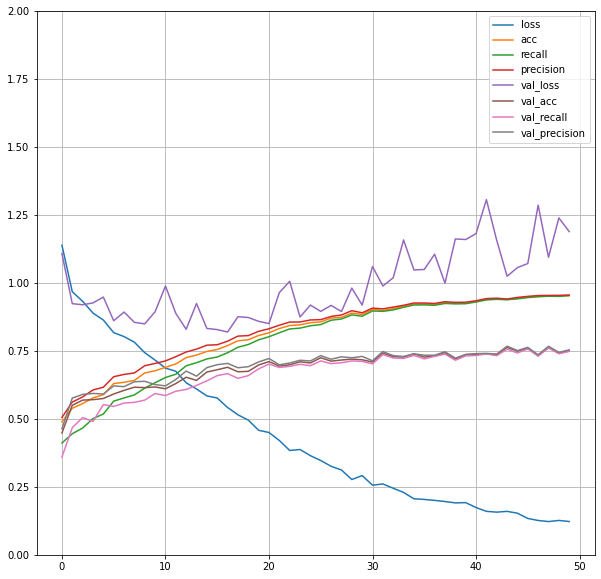

In [23]:
pd.DataFrame(history.history).plot(figsize=(10, 10))
plt.ylim((0,2))
plt.grid(True)
plt.show()

In [24]:
model.evaluate(test_generator)

83/83 [==============================] - 18s 213ms/step - loss: 1.2440 - acc: 0.7640 - recall: 0.7616 - precision: 0.7667


[1.2440201044082642,
 0.7639902830123901,
 0.7615571618080139,
 0.7666870951652527]

In [25]:
x=model.predict(test_generator)
actual=test_generator.labels
pred=np.argmax(x, axis=1)
from sklearn.metrics import confusion_matrix
confusion_matrix(actual,pred)

array([[194,  67,  27],
       [ 48, 749,  73],
       [ 20, 153, 313]])